In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://github.com/KAFSALAH/Fihm_Lessons/raw/master/ML_Series2_Classification/customer_churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Married,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Married           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Married             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('customerID', axis=1 , inplace=True)

In [13]:
object_cols = df.loc[:,df.dtypes=='object'].columns.tolist()
object_cols

['gender',
 'SeniorCitizen',
 'Married',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [10]:
df.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df['TotalCharges'].isna().sum()

11

In [15]:
df.TotalCharges.fillna(df.TotalCharges.median(), inplace=True)
df['TotalCharges'].isna().sum()

0

In [16]:
for i in object_cols:
  print('Number of unique elements in' , i, 'is', len(df.loc[:,i].unique()))
  print(df.loc[:,i].unique())

Number of unique elements in gender is 2
['Female' 'Male']
Number of unique elements in SeniorCitizen is 2
['No' 'Yes']
Number of unique elements in Married is 2
['Yes' 'No']
Number of unique elements in Dependents is 2
['No' 'Yes']
Number of unique elements in PhoneService is 2
['No' 'Yes']
Number of unique elements in MultipleLines is 3
['No phone service' 'No' 'Yes']
Number of unique elements in InternetService is 3
['DSL' 'Fiber optic' 'No']
Number of unique elements in OnlineSecurity is 3
['No' 'Yes' 'No internet service']
Number of unique elements in OnlineBackup is 3
['Yes' 'No' 'No internet service']
Number of unique elements in DeviceProtection is 3
['No' 'Yes' 'No internet service']
Number of unique elements in TechSupport is 3
['No' 'Yes' 'No internet service']
Number of unique elements in Contract is 3
['Month-to-month' 'One year' 'Two year']
Number of unique elements in PaperlessBilling is 2
['Yes' 'No']
Number of unique elements in PaymentMethod is 4
['Electronic check' '

In [18]:
df.Churn = df.Churn.map({'No':0, 'Yes':1})
df.InternetService = df.InternetService.map({'No':0, 'DSL':1, 'Fiber optic':2})
df.MultipleLines = df.MultipleLines.map({'No phone service':0, 'No':1, 'Yes':2})
df.Contract = df.Contract.map({'Month-to-month':0,'One year':1,'Two year':2})

similar_ordinal_cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']
for i in similar_ordinal_cols:
    df[i] = df[i].map({'No internet service':0, 'No' :1, 'Yes': 2})

In [19]:
object_cols = df.loc[:,df.dtypes==object].columns.tolist()
object_cols

['gender',
 'SeniorCitizen',
 'Married',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'PaymentMethod']

In [20]:
df

,gender,SeniorCitizen,Married,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,0,1,1,2,1,1,0,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,1,1,2,1,2,1,1,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,1,1,2,2,1,1,0,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,0,1,2,1,2,2,1,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,1,2,1,1,1,1,0,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,2,1,2,1,2,2,1,Yes,Mailed check,84.80,1990.50,0
7039,Female,No,Yes,Yes,72,Yes,2,2,1,2,2,1,1,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,No,Yes,Yes,11,No,0,1,2,1,1,1,0,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,2,2,1,1,1,1,0,Yes,Mailed check,74.40,306.60,1


In [21]:
object_cols.remove('PaymentMethod')

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in object_cols:
  df[i] = labelencoder.fit_transform(df[i])

In [24]:
encoded_df = pd.get_dummies(df, drop_first = True)
encoded_df.head()

,gender,SeniorCitizen,Married,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,1,2,1,1,0,1,29.85,29.85,0,0,1,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,0,56.95,1889.50,0,0,0,1
2,1,0,0,0,2,1,1,1,2,2,1,1,0,1,53.85,108.15,1,0,0,1
3,1,0,0,0,45,0,0,1,2,1,2,2,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,1,2,1,1,1,1,0,1,70.70,151.65,1,0,1,0


In [25]:
last_column = encoded_df.pop('Churn')
encoded_df.insert(df.shape[1]+1, 'Churn', last_column)
encoded_df.head(3)

,gender,SeniorCitizen,Married,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,1,1,2,1,1,0,1,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,1,1,2,1,2,1,1,0,56.95,1889.50,0,0,1,0
2,1,0,0,0,2,1,1,1,2,2,1,1,0,1,53.85,108.15,0,0,1,1


0    5174
1    1869
Name: Churn, dtype: int64

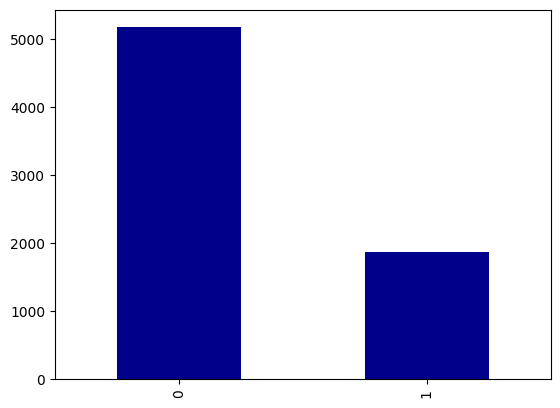

In [27]:

display(encoded_df.Churn.value_counts())
encoded_df.Churn.value_counts(normalize=False ).plot(kind='bar', color= 'darkblue');

In [28]:
display(encoded_df.Churn.value_counts(normalize = True))

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [32]:
feature_cols = encoded_df.columns[:-1]
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split =StratifiedShuffleSplit(n_splits=1,
                                         test_size= 0.25,
                                         random_state=123)
train_idx, test_idx = next(strat_shuf_split.split(encoded_df[feature_cols], encoded_df.Churn))

x_train = encoded_df.loc[train_idx, feature_cols]
y_train = encoded_df.loc[train_idx, 'Churn']
x_test = encoded_df.loc[test_idx, feature_cols]
y_test = encoded_df.loc[test_idx, 'Churn']


In [33]:
y_train.value_counts(normalize= True)

0    0.73457
1    0.26543
Name: Churn, dtype: float64

In [34]:
y_test.value_counts(normalize= True)

0    0.73481
1    0.26519
Name: Churn, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_preds = knn.predict(x_test)


In [39]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_preds))
print('-------------')
print('Accuracy score: ', round(accuracy_score(y_test, y_preds), 2))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1294
           1       0.56      0.52      0.54       467

    accuracy                           0.76      1761
   macro avg       0.70      0.69      0.69      1761
weighted avg       0.76      0.76      0.76      1761

-------------
Accuracy score:  0.76


In [40]:
from sklearn.svm import SVC
SVM_Model = SVC(kernel='rbf', gamma=1)
SVM_Model.fit(x_train, y_train)
y_preds = SVM_Model.predict(x_test)

In [41]:
print(classification_report(y_test, y_preds))
print('-------------')
print('Accuracy score: ', round(accuracy_score(y_test, y_preds), 2))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1294
           1       0.63      0.33      0.43       467

    accuracy                           0.77      1761
   macro avg       0.71      0.63      0.64      1761
weighted avg       0.75      0.77      0.74      1761

-------------
Accuracy score:  0.77


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)
lr_prob = lr.predict_proba(x_test).max(axis=1)

Logistic_Results = (pd.DataFrame([lr_preds, lr_prob])
.T.rename(columns={0:'Prediction', 1 : 'Probability'}))

Logistic_Results.head(10)

,Prediction,Probability
0,1.0,0.743765
1,0.0,0.958825
2,0.0,0.996193
3,0.0,0.834216
4,0.0,0.953707
5,1.0,0.506502
6,0.0,0.775160
7,0.0,0.692961
8,0.0,0.722585
9,0.0,0.993586


In [43]:
print(classification_report(y_test, lr_preds))
print('-------------')
print('Accuracy score: ', round(accuracy_score(y_test, lr_preds), 2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.65      0.52      0.58       467

    accuracy                           0.80      1761
   macro avg       0.75      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761

-------------
Accuracy score:  0.8


In [47]:
from imblearn.over_sampling import SMOTE
Smote = SMOTE(random_state=123)
x_Smote, y_Smote = Smote.fit_resample(x_train, y_train)

In [48]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_Smote, y_Smote)
lr_preds = lr.predict(x_test)

In [49]:
print(classification_report(y_test, lr_preds))
print('-------------')
print('Accuracy score: ', round(accuracy_score(y_test, lr_preds), 2))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1294
           1       0.53      0.78      0.63       467

    accuracy                           0.76      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.76      0.77      1761

-------------
Accuracy score:  0.76
